<a href="https://colab.research.google.com/github/bomij33/With-GANADA/blob/bomi/code/audio_classification_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 버전 다운로드 2.8.0
##### tensorflow 버전 2.8.0 실행 필요함. 버전이 맞지 않으면 uninstall 후 install함

In [1]:
# 먼저 현재 버전 확인
# import tensorflow as tf
# print(tf.__version__)

In [ ]:
# !pip uninstall tensorflow

In [ ]:
# !pip install tensorflow==2.8.0

In [ ]:
# restart 후 확인
# import tensorflow as tf
# print(tf.__version__)

# 데이터 로딩

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import IPython
import librosa
SAMPLING_RATE = 22050

In [ ]:
import glob

file_list = glob.glob("/gdrive/MyDrive/Audio/C/*.wav")  # 0 : 부모, 1 : 까치, 2 : 의자 
print(len(file_list))
print(file_list[:3]) 

1226
['/gdrive/MyDrive/Audio/C/01_227.wav', '/gdrive/MyDrive/Audio/C/01_228.wav', '/gdrive/MyDrive/Audio/C/01_229.wav']


In [ ]:
def load_wav(file_name):
    data, _ = librosa.load(file_name, sr=SAMPLING_RATE)
    return data

raw_x = [] # data
raw_y = [] # label
for file_name in file_list:
    label = int(file_name.split("/")[-1].split("_")[0])  

    print(file_name, label)
    data = load_wav(file_name)
    raw_x.append(data)
    raw_y.append(label)


/gdrive/MyDrive/Audio/C/01_227.wav 1
/gdrive/MyDrive/Audio/C/01_228.wav 1
/gdrive/MyDrive/Audio/C/01_229.wav 1
/gdrive/MyDrive/Audio/C/01_230.wav 1
/gdrive/MyDrive/Audio/C/01_231.wav 1
/gdrive/MyDrive/Audio/C/01_232.wav 1
/gdrive/MyDrive/Audio/C/01_233.wav 1
/gdrive/MyDrive/Audio/C/01_234.wav 1
/gdrive/MyDrive/Audio/C/01_235.wav 1
/gdrive/MyDrive/Audio/C/01_236.wav 1
/gdrive/MyDrive/Audio/C/01_237.wav 1
/gdrive/MyDrive/Audio/C/01_238.wav 1
/gdrive/MyDrive/Audio/C/01_239.wav 1
/gdrive/MyDrive/Audio/C/01_240.wav 1
/gdrive/MyDrive/Audio/C/01_241.wav 1
/gdrive/MyDrive/Audio/C/01_242.wav 1
/gdrive/MyDrive/Audio/C/01_243.wav 1
/gdrive/MyDrive/Audio/C/01_244.wav 1
/gdrive/MyDrive/Audio/C/01_245.wav 1
/gdrive/MyDrive/Audio/C/01_246.wav 1
/gdrive/MyDrive/Audio/C/01_247.wav 1
/gdrive/MyDrive/Audio/C/01_248.wav 1
/gdrive/MyDrive/Audio/C/01_249.wav 1
/gdrive/MyDrive/Audio/C/01_250.wav 1
/gdrive/MyDrive/Audio/C/01_251.wav 1
/gdrive/MyDrive/Audio/C/01_253.wav 1
/gdrive/MyDrive/Audio/C/01_252.wav 1
/

In [ ]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

0


In [ ]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


In [ ]:
from collections import Counter
Counter(raw_y)


Counter({1: 409, 2: 420, 0: 397})

# padding

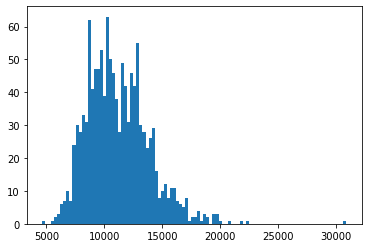

In [ ]:
lens = []
for i in range(len(raw_x)):
    lens.append(len(raw_x[i]))

plt.hist(lens, bins=100)
plt.show()

In [ ]:
print(lens[:10])

[9702, 10364, 9702, 13451, 13671, 12569, 12128, 11907, 12348, 12569]


In [ ]:
from tensorflow.keras.preprocessing import sequence

padded_raw_x = sequence.pad_sequences(raw_x, maxlen=22050, padding='post', dtype=float)
# 파일 길이를 똑같이 맞춤 22050 (1초로)

In [ ]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

0


In [ ]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


In [ ]:
raw_x = np.array(padded_raw_x)
raw_y = np.array(raw_y)
print(raw_x.shape)  
print(raw_y.shape)

(1226, 22050)
(1226,)


In [ ]:
print(raw_y[980])
IPython.display.Audio(raw_x[980], rate=SAMPLING_RATE)

0


In [ ]:
print(raw_y[1])
IPython.display.Audio(raw_x[1], rate=SAMPLING_RATE)

1


# Normalization

In [ ]:
max = np.max(raw_x)
min = np.min(raw_x)
print(min, max)

-1.0326271057128906 1.1331255435943604


In [ ]:
# raw_x = (raw_x - min) / (max - min)

# 2차원으로 reshape

In [ ]:
print(raw_x.shape)
raw_x = raw_x.reshape((len(raw_x),-1,1))
print(raw_x.shape)

(1226, 22050)
(1226, 22050, 1)


# 데이터 분리
###### train, test 데이터로 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(raw_x, raw_y, test_size=0.2, shuffle=True)

In [ ]:
print(len(train_y))
print(train_y[len(train_y)-1])
IPython.display.Audio(train_x[len(train_y)-1].squeeze(), rate=SAMPLING_RATE)

980
1


In [ ]:
print(train_y[1])
IPython.display.Audio(train_x[1].squeeze(), rate=SAMPLING_RATE)

0


In [ ]:
print(train_x.shape)
print(train_y.shape)


(980, 22050, 1)
(980,)


In [ ]:
# loss graph를 학습하면서 실시간으로 그리는 방법

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("epochs = ", self.epochs[-1], "loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

# 모델 생성

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input, Activation
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Conv1D, MaxPooling1D, AveragePooling1D, Add, MaxPool1D
from tensorflow.keras.layers import Dropout, GaussianNoise, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2

input_shape = train_x.shape[1:]
num_classes = 3  # C 폴더 [0: 부모, 1:까치, 2:의자]

model = keras.Sequential()
model.add(Input(input_shape))

model.add(Conv1D(32, 27, padding="same", activation="relu"))  
model.add(Conv1D(32, 27, padding="same", activation="relu")) 
model.add(MaxPooling1D())
model.add(BatchNormalization())

model.add(Conv1D(64, 27, padding="same", activation="relu"))  
model.add(Conv1D(64, 27, padding="same", activation="relu"))  
model.add(MaxPooling1D())
model.add(BatchNormalization())

model.add(Conv1D(128, 27, padding="same", activation="relu"))  
model.add(Conv1D(128, 27, padding="same", activation="relu"))  
model.add(Conv1D(128, 27, padding="same", activation="relu"))  
model.add(MaxPooling1D())
model.add(BatchNormalization())

model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(MaxPooling1D())
model.add(BatchNormalization())

model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(MaxPooling1D())
model.add(BatchNormalization())

model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(Conv1D(256, 27, padding="same", activation="relu"))  
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation="relu")) #, kernel_regularizer=l2()))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation="softmax"))  

from tensorflow.keras.optimizers import Adam, Adadelta, SGD
optimizer = Adam(learning_rate=0.001*0.1, decay=0.01) 

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 22050, 32)         896       
                                                                 
 conv1d_17 (Conv1D)          (None, 22050, 32)         27680     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 11025, 32)        0         
 1D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 11025, 32)        128       
 hNormalization)                                                 
                                                                 
 conv1d_18 (Conv1D)          (None, 11025, 64)         55360     
                                                                 
 conv1d_19 (Conv1D)          (None, 11025, 64)        

# 학습

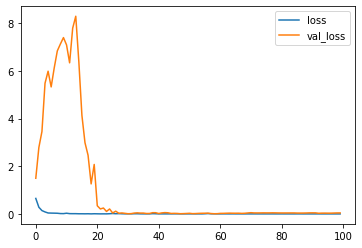

epochs =  99 loss =  0.0003833191585727036 , val_loss =  0.04160868376493454
28/28 [==============================] - 16s 577ms/step - loss: 3.8332e-04 - acc: 1.0000 - val_loss: 0.0416 - val_acc: 0.9898


In [ ]:
plot_losses = PlotLosses()
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, batch_size=32,
                    callbacks=[plot_losses])

# 평가 & 예측

8/8 [==============================] - 1s 134ms/step - loss: 0.0737 - acc: 0.9919
loss= 0.07368122786283493
acc= 0.9918699264526367


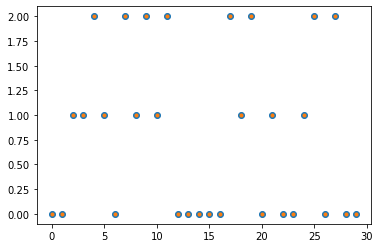

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)


y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)
plt.plot(test_y[:30], 'o')
plt.plot(predicted[:30], '.')
plt.show()


# 모델 저장

In [ ]:
model.save('../gdrive/MyDrive/Audio/model/ganada_C.h5')